In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [5]:
pd.set_option('display.max_rows',1000)

In [8]:
loan= pd.read_csv(r"C:\Users\dell 7520\loan.csv")

In [9]:
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [26]:
loan.shape


(39717, 111)

In [27]:
loan.dtypes

id                                  int64
member_id                           int64
loan_amnt                           int64
funded_amnt                         int64
funded_amnt_inv                   float64
term                               object
int_rate                           object
installment                       float64
grade                              object
sub_grade                          object
emp_title                          object
emp_length                         object
home_ownership                     object
annual_inc                        float64
verification_status                object
issue_d                            object
loan_status                        object
pymnt_plan                         object
url                                object
desc                               object
purpose                            object
title                              object
zip_code                           object
addr_state                        

In [28]:
100 * loan.isnull().mean()

id                                  0.000000
member_id                           0.000000
loan_amnt                           0.000000
funded_amnt                         0.000000
funded_amnt_inv                     0.000000
term                                0.000000
int_rate                            0.000000
installment                         0.000000
grade                               0.000000
sub_grade                           0.000000
emp_title                           6.191303
emp_length                          2.706650
home_ownership                      0.000000
annual_inc                          0.000000
verification_status                 0.000000
issue_d                             0.000000
loan_status                         0.000000
pymnt_plan                          0.000000
url                                 0.000000
desc                               32.585543
purpose                             0.000000
title                               0.027696
zip_code  

In [29]:
#Drop the columns having only null values.
loan.dropna(axis = 1, how = 'all', inplace = True)
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,Jun-16,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


In [30]:

loan.drop(['revol_bal','total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries','collection_recovery_fee', 'last_pymnt_d',
'last_pymnt_amnt','next_pymnt_d', 'last_credit_pull_d','delinq_2yrs','out_prncp', 'out_prncp_inv', 'total_pymnt', 
'total_pymnt_inv','title','application_type','policy_code','collections_12_mths_ex_med','initial_list_status',
'pymnt_plan','delinq_amnt','chargeoff_within_12_mths','acc_now_delinq',"member_id","emp_title","zip_code","tax_liens",
'url','desc','mths_since_last_delinq','mths_since_last_record'],axis=1, inplace=True)

In [31]:
loan.grade.value_counts()

grade
B    12020
A    10085
C     8098
D     5307
E     2842
F     1049
G      316
Name: count, dtype: int64

In [32]:
loan = loan[loan.loan_status != "Current"]
loan.loan_status.unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

In [33]:
100 * loan.isnull().mean()

id                      0.000000
loan_amnt               0.000000
funded_amnt             0.000000
funded_amnt_inv         0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_length              2.677761
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
addr_state              0.000000
dti                     0.000000
earliest_cr_line        0.000000
inq_last_6mths          0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_util              0.129611
total_acc               0.000000
pub_rec_bankruptcies    1.806776
dtype: float64

In [34]:
loan.shape

(38577, 25)

In [35]:
#Identifying the mode value 
print('Mode : ' + loan.emp_length.mode())
loan.emp_length.value_counts()

0    Mode : 10+ years
Name: emp_length, dtype: object


emp_length
10+ years    8488
< 1 year     4508
2 years      4291
3 years      4012
4 years      3342
5 years      3194
1 year       3169
6 years      2168
7 years      1711
8 years      1435
9 years      1226
Name: count, dtype: int64

In [36]:
#Delaing with null values in emp_length, revol_util and pub_rec_bankruptcies column
loan.emp_length.fillna(loan.emp_length.mode()[0],inplace=True)
loan.dropna(axis = 0, subset = ['revol_util'] , inplace = True)
loan.pub_rec_bankruptcies.fillna(loan.pub_rec_bankruptcies.mode()[0],inplace=True)

In [37]:
100 * loan.isnull().mean()

id                      0.0
loan_amnt               0.0
funded_amnt             0.0
funded_amnt_inv         0.0
term                    0.0
int_rate                0.0
installment             0.0
grade                   0.0
sub_grade               0.0
emp_length              0.0
home_ownership          0.0
annual_inc              0.0
verification_status     0.0
issue_d                 0.0
loan_status             0.0
purpose                 0.0
addr_state              0.0
dti                     0.0
earliest_cr_line        0.0
inq_last_6mths          0.0
open_acc                0.0
pub_rec                 0.0
revol_util              0.0
total_acc               0.0
pub_rec_bankruptcies    0.0
dtype: float64

In [38]:
#Removing % from int_rate or revol_util column and converting them from string to integer
loan['int_rate'] = pd.to_numeric(loan['int_rate'].str.strip('%'))
loan['revol_util']= pd.to_numeric(loan['revol_util'].str.strip('%'))

In [39]:
#Converting issue_d into date format
loan['issue_d'] = pd.to_datetime(loan['issue_d'] , format='%b-%d')
loan['issue_d'] = loan['issue_d'].apply(lambda x: x.replace(year=2024))

In [41]:
# Deriving new column as issue_month and issue_year from issue_d column
loan['issue_month'] = loan['issue_d'].dt.strftime('%b')
loan['issue_week']= loan['issue_d'].dt.weekday.astype(object)

In [42]:
loan.dtypes

id                               int64
loan_amnt                        int64
funded_amnt                      int64
funded_amnt_inv                float64
term                            object
int_rate                       float64
installment                    float64
grade                           object
sub_grade                       object
emp_length                      object
home_ownership                  object
annual_inc                     float64
verification_status             object
issue_d                 datetime64[ns]
loan_status                     object
purpose                         object
addr_state                      object
dti                            float64
earliest_cr_line                object
inq_last_6mths                   int64
open_acc                         int64
pub_rec                          int64
revol_util                     float64
total_acc                        int64
pub_rec_bankruptcies           float64
issue_month              

In [43]:
loan.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,...,dti,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc,pub_rec_bankruptcies,issue_month,issue_week
0,1077501,5000,5000,4975.0,36 months,10.65,162.87,B,B2,10+ years,...,27.65,Jan-85,1,3,0,83.7,9,0.0,Dec,2
1,1077430,2500,2500,2500.0,60 months,15.27,59.83,C,C4,< 1 year,...,1.00,Apr-99,5,3,0,9.4,4,0.0,Dec,2
2,1077175,2400,2400,2400.0,36 months,15.96,84.33,C,C5,10+ years,...,8.72,Nov-01,2,2,0,98.5,10,0.0,Dec,2
3,1076863,10000,10000,10000.0,36 months,13.49,339.31,C,C1,10+ years,...,20.00,Feb-96,1,10,0,21.0,37,0.0,Dec,2
5,1075269,5000,5000,5000.0,36 months,7.90,156.46,A,A4,3 years,...,11.20,Nov-04,3,9,0,28.3,12,0.0,Dec,2


Outliers Detection 

In [11]:
numerical_col= ['loan_amnt','funded_amnt', 'funded_amnt_inv', 'int_rate', 'installment','annual_inc','dti','revol_util']
categorical_col= ['term','grade', 'sub_grade','emp_length', 'home_ownership','verification_status','loan_status','purpose', 'addr_state','inq_last_6mths','open_acc','pub_rec','total_acc','pub_rec_bankruptcies','issue_month','issue_week']
extra_col=['id','issue_d','earliest_cr_line',]

len(numerical_col+categorical_col+extra_col)

27

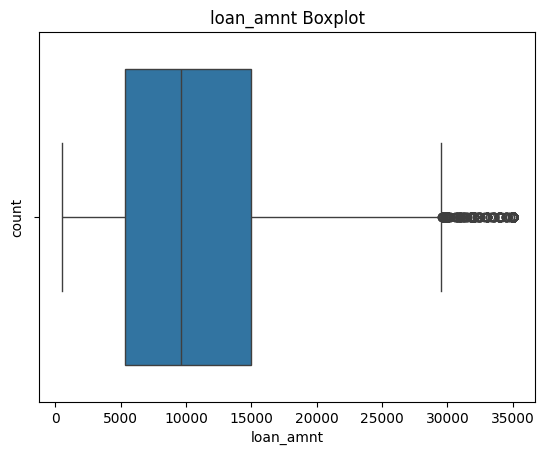

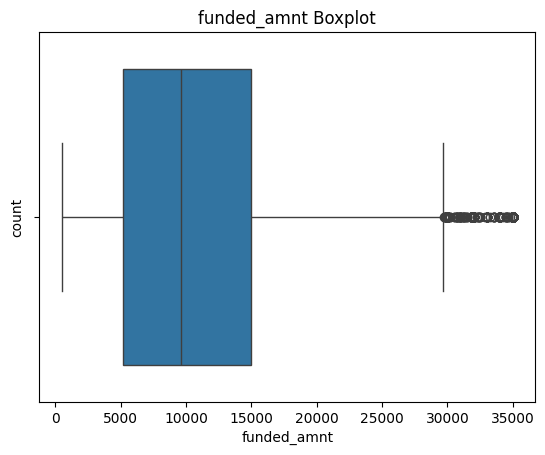

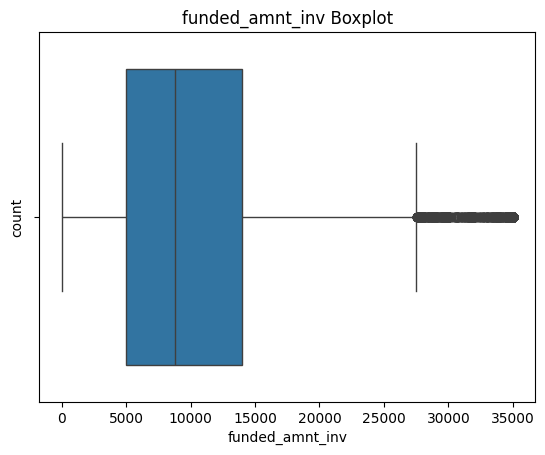

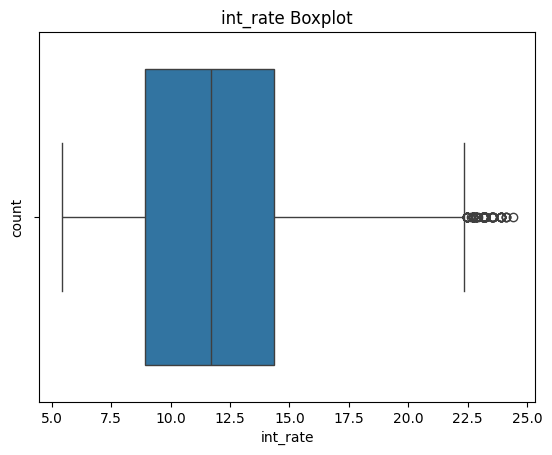

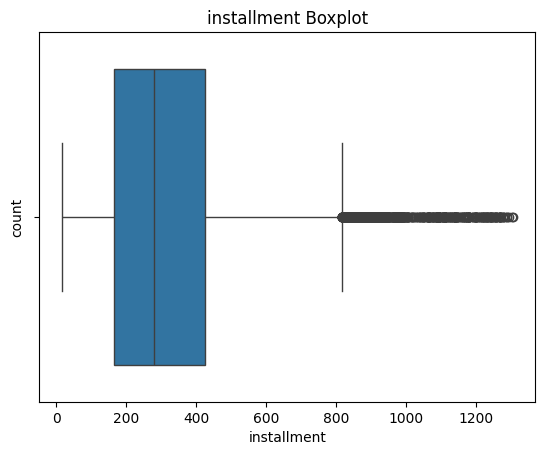

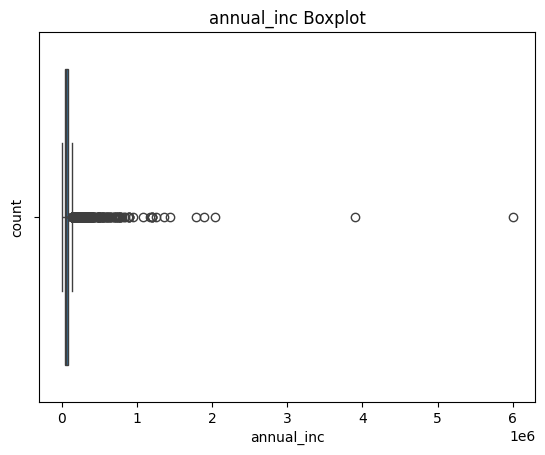

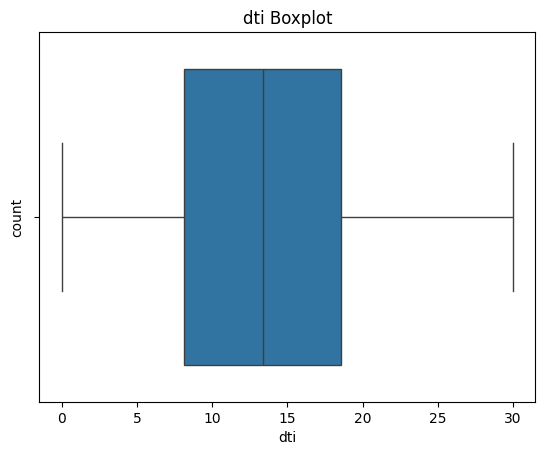

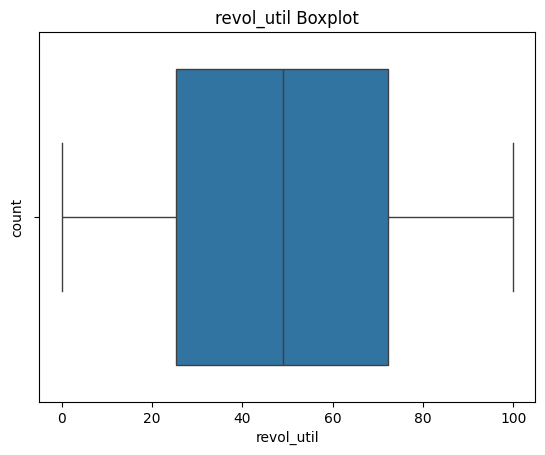

In [45]:
for i in numerical_col:
    sns.boxplot(x=loan[i])
    plt.ylabel('count')
    plt.title(f'{i} Boxplot')
    plt.show()

In [46]:
for i in numerical_col:
    print(i + ' at different quartiles')
    print(loan[i].quantile([0.01,0.1,0.5,0.10,0.50,0.75,0.90,0.95,0.96,0.97,0.98,0.99,1.0]))

loan_amnt at different quartiles
0.01     1200.0
0.10     3125.0
0.50     9600.0
0.10     3125.0
0.50     9600.0
0.75    15000.0
0.90    21600.0
0.95    25000.0
0.96    25000.0
0.97    28000.0
0.98    30000.0
0.99    35000.0
1.00    35000.0
Name: loan_amnt, dtype: float64
funded_amnt at different quartiles
0.01     1200.0
0.10     3075.0
0.50     9600.0
0.10     3075.0
0.50     9600.0
0.75    15000.0
0.90    20000.0
0.95    25000.0
0.96    25000.0
0.97    27000.0
0.98    30000.0
0.99    35000.0
1.00    35000.0
Name: funded_amnt, dtype: float64
funded_amnt_inv at different quartiles
0.01      672.928581
0.10     2850.000000
0.50     8750.000000
0.10     2850.000000
0.50     8750.000000
0.75    14000.000000
0.90    19975.000000
0.95    24506.582238
0.96    24950.000000
0.97    25828.061320
0.98    29890.414864
0.99    34721.583150
1.00    35000.000000
Name: funded_amnt_inv, dtype: float64
int_rate at different quartiles
0.01     5.42
0.10     7.14
0.50    11.71
0.10     7.14
0.50    11.7

In [47]:
loan.shape

(38527, 27)

In [48]:
#We can identify that outliers are their from  annual_inc boxplot and values at different quartiles so let's remove those outliers first using 95 percent quartile.

#Removing values grater than equal to 0.95 quartile 
annual_inc_99_per = loan['annual_inc'].quantile(0.99)
loan = loan[loan.annual_inc <= annual_inc_99_per]

In [49]:
loan.shape

(38142, 27)

Univariate Analysis 

In [50]:
categorical_col

['term',
 'grade',
 'sub_grade',
 'emp_length',
 'home_ownership',
 'verification_status',
 'loan_status',
 'purpose',
 'addr_state',
 'inq_last_6mths',
 'open_acc',
 'pub_rec',
 'total_acc',
 'pub_rec_bankruptcies',
 'issue_month',
 'issue_week']

Univariate Analysis 

Loan Status

loan_status
Fully Paid     85.401919
Charged Off    14.598081
Name: count, dtype: float64


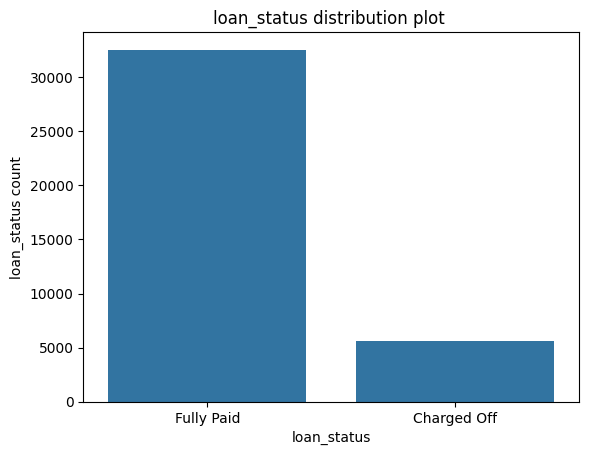

In [52]:
print(100*  (loan['loan_status'].value_counts()/loan['loan_status'].value_counts().sum()))

sns.countplot(x = 'loan_status', data = loan)
plt.title('loan_status distribution plot ')
plt.ylabel('loan_status count')
plt.show()

Observation : 
85.40 percent of people have fully paid the loan whereas approx. 14.60 percent of people defaulted.

grade
B    30.360233
A    26.157517
C    20.289969
D    13.140370
E     6.814011
F     2.485449
G     0.752451
Name: count, dtype: float64


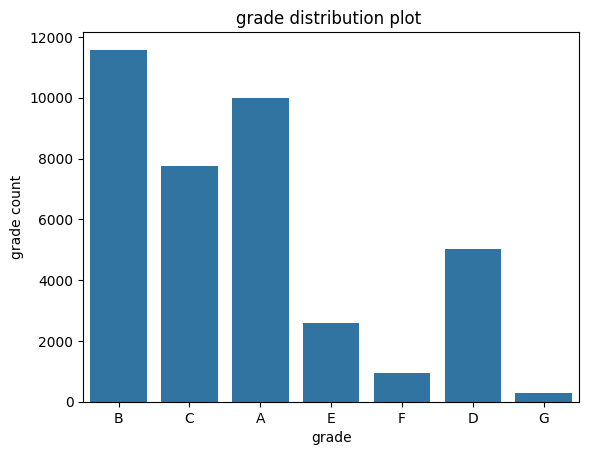

In [54]:
print(100*  (loan['grade'].value_counts()/loan['grade'].value_counts().sum()))

sns.countplot(x = 'grade', data = loan)
plt.title('grade distribution plot ')
plt.ylabel('grade count')
plt.show()

Findings : Borrowers from group B having higher count followed by group A comparative to other groups 

Sub Grade

sub_grade
A4    7.482565
B3    7.320015
A5    7.060458
B5    6.816633
B4    6.355199
C1    5.322217
B2    5.185884
C2    5.004981
A3    4.716585
B1    4.682502
A2    3.930051
C3    3.846154
D2    3.319176
C4    3.140895
C5    2.975722
A1    2.967857
D3    2.883960
D1    2.406796
D4    2.370091
D5    2.160348
E1    1.866709
E2    1.575691
E3    1.316134
E4    1.098527
E5    0.956950
F1    0.781291
F2    0.600388
F3    0.440459
F4    0.380158
F5    0.283152
G1    0.238582
G2    0.191390
G4    0.133711
G3    0.115358
G5    0.073410
Name: count, dtype: float64


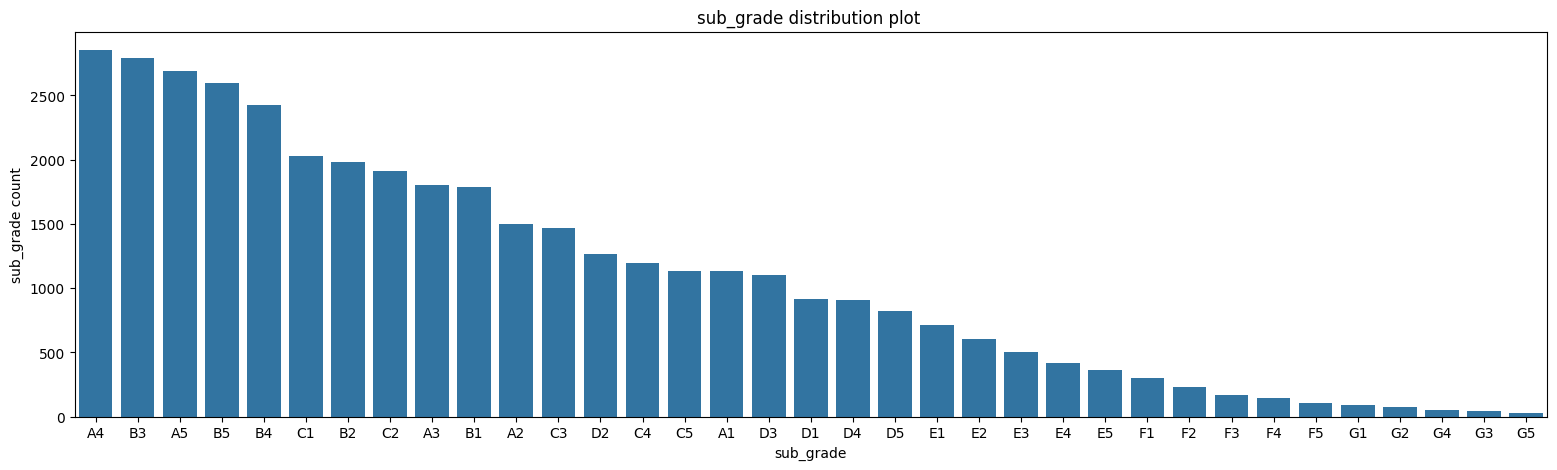

In [55]:
print(100*  (loan['sub_grade'].value_counts()/loan['sub_grade'].value_counts().sum()))

plt.figure(figsize=(19,5))
sns.countplot(x = 'sub_grade', data = loan, order=loan.sub_grade.value_counts().index)
plt.title('sub_grade distribution plot ')
plt.ylabel('sub_grade count')
plt.show()

Findings : Although A4, B3 and A5 sub groups are almost similar in terms of count but borrowers from sub-group A4 having higher count followed by group B3 then followed by other groups 

Emp Length

emp_length
10+ years    24.587069
< 1 year     11.711499
2 years      11.116355
3 years      10.416339
4 years       8.675476
5 years       8.295317
1 year        8.224529
6 years       5.631587
7 years       4.441298
8 years       3.715065
9 years       3.185465
Name: count, dtype: float64


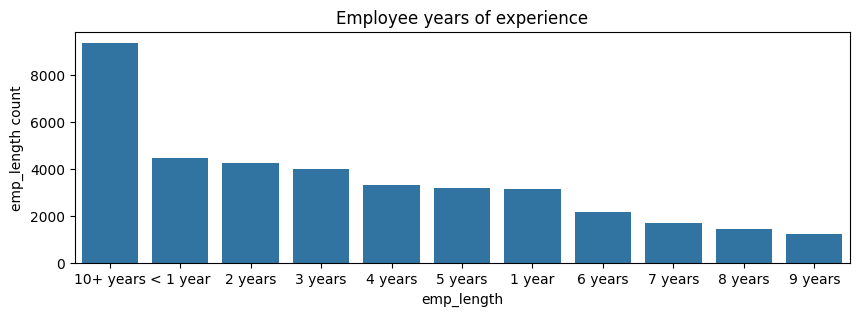

In [56]:
print(100*  (loan['emp_length'].value_counts()/loan['emp_length'].value_counts().sum()))

plt.figure(figsize=(10,3))
sns.countplot(x = 'emp_length', data = loan, order=loan.emp_length.value_counts().index )
plt.title('Employee years of experience')
plt.ylabel('emp_length count')
plt.show()

24 percent of the borrowers are having 10+ years of experience which is the highest comparative to other





Verification Status

verification_status
Not Verified       43.458655
Verified           31.516439
Source Verified    25.024907
Name: count, dtype: float64


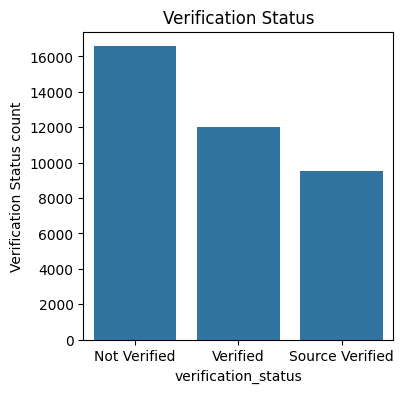

In [57]:
print(100*  (loan['verification_status'].value_counts()/loan['verification_status'].value_counts().sum()))

plt.figure(figsize=(4,4))
sns.countplot(x = 'verification_status', data = loan, order=loan.verification_status.value_counts().index )
plt.title('Verification Status')
plt.ylabel('Verification Status count')
plt.show()

Most of the borrowers are not verified 

Home Onership

home_ownership
RENT        48.149022
MORTGAGE    43.883383
OWN          7.713282
OTHER        0.246447
NONE         0.007865
Name: count, dtype: float64


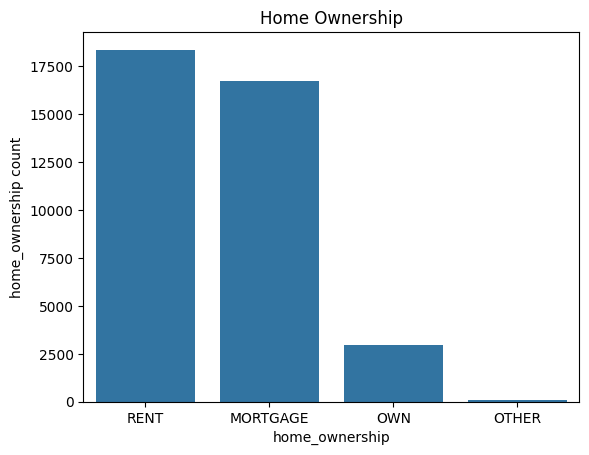

In [58]:
print(100*  (loan['home_ownership'].value_counts()/loan['home_ownership'].value_counts().sum()))

# Only 3 values are their for NONE which is not making sense so we are moving those values to other
loan.home_ownership= loan.home_ownership.replace('NONE','OTHER')

sns.countplot(x = 'home_ownership', data = loan, order=loan.home_ownership.value_counts().index )
plt.title('Home Ownership')
plt.ylabel('home_ownership count')
plt.show()

Most of the borrowers have rent or mortgage house.

Purpose

purpose
debt_consolidation    46.943002
credit_card           13.069582
other                 10.009963
home_improvement       7.320015
major_purchase         5.568664
small_business         4.514708
car                    3.903833
wedding                2.401552
medical                1.761837
moving                 1.489172
vacation               0.980546
house                  0.935976
educational            0.838970
renewable_energy       0.262178
Name: count, dtype: float64


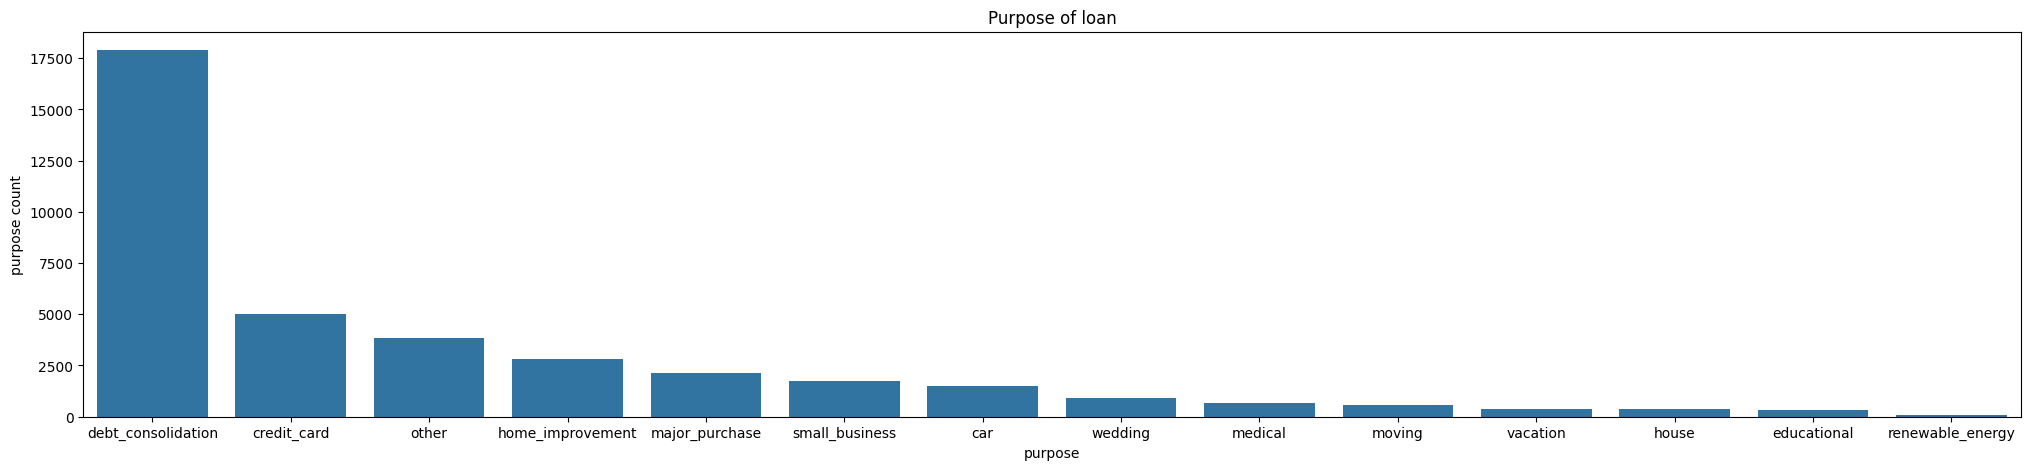

In [59]:
print(100*  (loan['purpose'].value_counts()/loan['purpose'].value_counts().sum()))

plt.figure(figsize=(25,5))
sns.countplot(x = 'purpose', data = loan, order=loan.purpose.value_counts().index )
plt.title('Purpose of loan')
plt.ylabel('purpose count')
plt.show()

In [60]:
categorical_col

['term',
 'grade',
 'sub_grade',
 'emp_length',
 'home_ownership',
 'verification_status',
 'loan_status',
 'purpose',
 'addr_state',
 'inq_last_6mths',
 'open_acc',
 'pub_rec',
 'total_acc',
 'pub_rec_bankruptcies',
 'issue_month',
 'issue_week']

Address State

addr_state
CA    18.024750
NY     9.553773
FL     7.204656
TX     6.879555
NJ     4.619579
IL     3.819936
PA     3.814692
VA     3.557758
GA     3.536784
MA     3.350637
OH     3.064863
MD     2.642756
AZ     2.191810
WA     2.123643
CO     1.982067
NC     1.945362
CT     1.866709
MI     1.830004
MO     1.740863
MN     1.575691
NV     1.242725
SC     1.192911
WI     1.148340
OR     1.137853
AL     1.129988
LA     1.101148
KY     0.815374
OK     0.749830
KS     0.665933
UT     0.658067
AR     0.613497
DC     0.547952
RI     0.498139
NM     0.469299
WV     0.450946
HI     0.432594
NH     0.429972
DE     0.293640
MT     0.217608
WY     0.209743
AK     0.201877
SD     0.159929
VT     0.138954
MS     0.049814
TN     0.044570
IN     0.023596
ID     0.015731
IA     0.013109
NE     0.013109
ME     0.007865
Name: count, dtype: float64


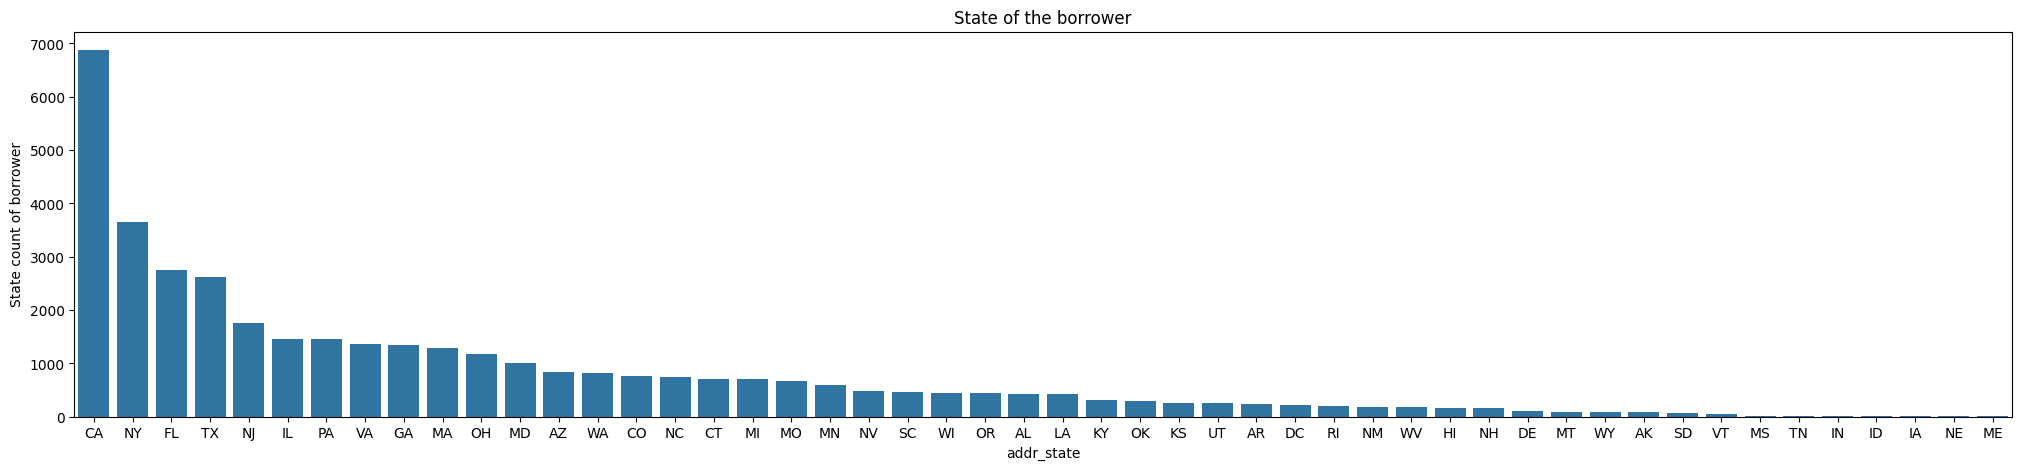

In [61]:
print(100*  (loan['addr_state'].value_counts()/loan['addr_state'].value_counts().sum()))

plt.figure(figsize=(25,5))
sns.countplot(x = 'addr_state', data = loan, order=loan.addr_state.value_counts().index )
plt.title('State of the borrower')
plt.ylabel('State count of borrower')
plt.show()

Most of the borrowers from CA state followed by NY, FL and others.

Issue Month

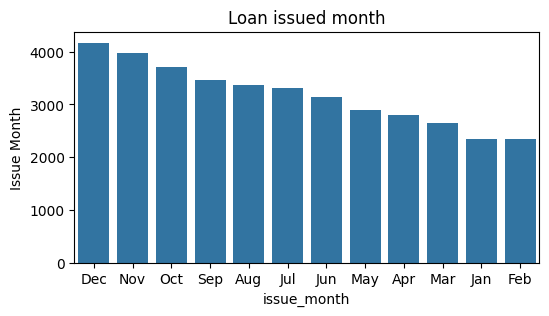

In [62]:

plt.figure(figsize=(6,3))
sns.countplot(x = 'issue_month', data = loan, order=loan.issue_month.value_counts().index )
plt.title('Loan issued month')
plt.ylabel('Issue Month')
plt.show()

Most of the loans were issued in the month of November and december

Segmented Univariate Analysis

Loan Amount

<Axes: title={'center': 'Grade vs Loan Amount'}, xlabel='grade', ylabel='loan_amnt'>

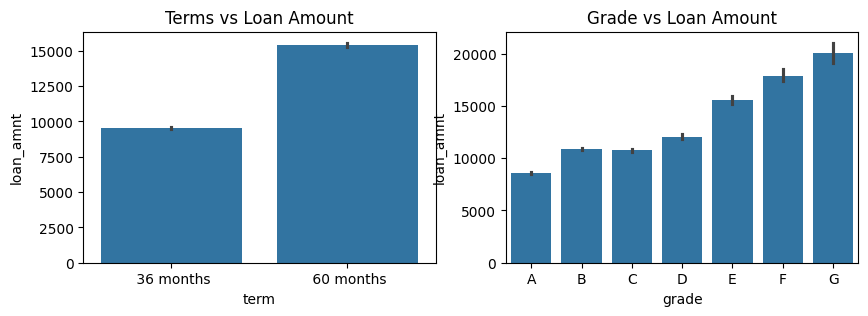

In [64]:
plt.figure(figsize=(10,3))
plt.subplot(121)
sns.barplot(x='term', y=loan.loan_amnt, data=loan)
plt.title('Terms vs Loan Amount')
plt.subplot(122)
plt.title('Grade vs Loan Amount')
order_of_grade = loan.grade.unique()
order_of_grade.sort()
sns.barplot(x='grade', y=loan.loan_amnt, order = order_of_grade, data=loan)

Borrower taking higher loan prefer 60 months and  grade value of G and F are taking higher loan

<Axes: title={'center': 'Home Ownership vs Loan Amount'}, xlabel='home_ownership', ylabel='loan_amnt'>

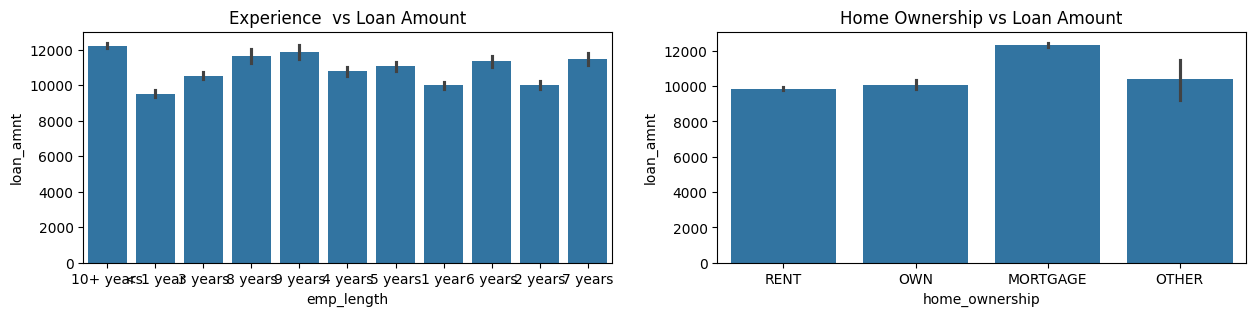

In [65]:
plt.figure(figsize=(15,3))
plt.subplot(121)
sns.barplot(x='emp_length', y=loan.loan_amnt, data=loan)
plt.title('Experience  vs Loan Amount')
plt.subplot(122)
plt.title('Home Ownership vs Loan Amount')
sns.barplot(x='home_ownership', y=loan.loan_amnt, data=loan)

Borrowers with 10+ years of experience and having mortgage houses are taking higher loans.

Text(0.5, 1.0, 'Loan Status vs Loan Amount')

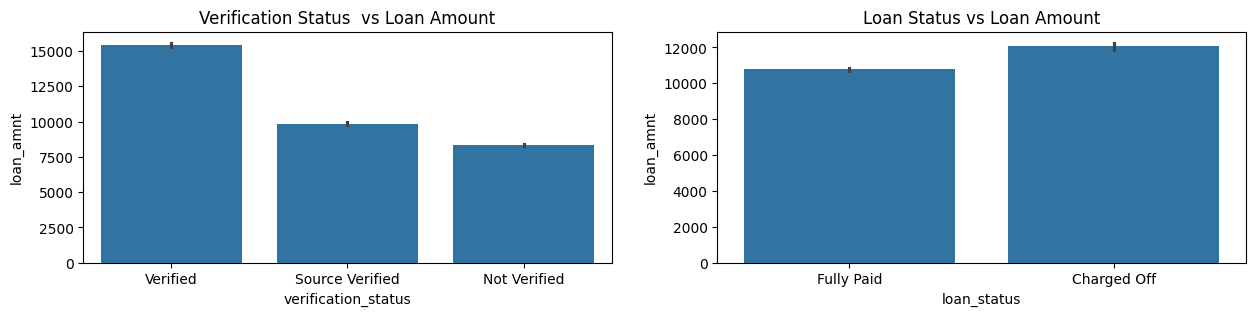

In [66]:
plt.figure(figsize=(15,3))
plt.subplot(121)
sns.barplot(x='verification_status', y=loan.loan_amnt, data=loan)
plt.title('Verification Status  vs Loan Amount')
plt.subplot(122)
sns.barplot(x='loan_status', y=loan.loan_amnt, data=loan)
plt.title('Loan Status vs Loan Amount')

Borrowers who are verified and status as charged off are getting higher amount of loan

Text(0.5, 1.0, 'Purpose  vs Loan Amount')

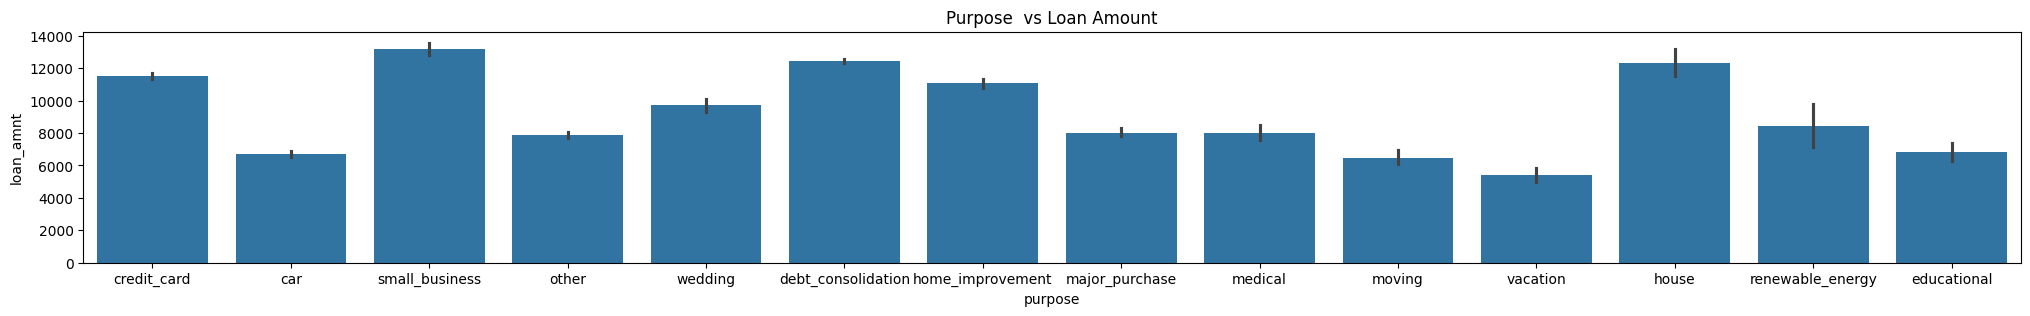

In [67]:
plt.figure(figsize=(25,3))
sns.barplot(x='purpose', y=loan.loan_amnt, data=loan)
plt.title('Purpose  vs Loan Amount')

Borrower with the purpose of opening small business taking higher loan

Interest Rate

<Axes: title={'center': 'Grade vs Int Rate'}, xlabel='grade', ylabel='int_rate'>

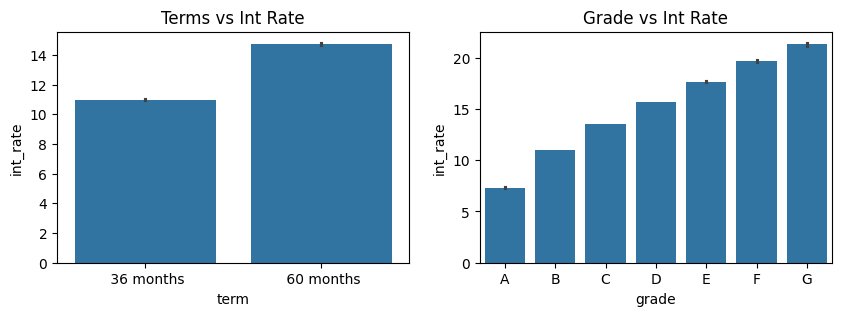

In [68]:
plt.figure(figsize=(10,3))
plt.subplot(121)
sns.barplot(x='term', y=loan.int_rate, data=loan)
plt.title('Terms vs Int Rate')
plt.subplot(122)
plt.title('Grade vs Int Rate')
order_of_grade = loan.grade.unique()
order_of_grade.sort()
sns.barplot(x='grade', y=loan.int_rate, order = order_of_grade, data=loan)

Borrower have to pay high interest rate having 60 months loan duration and  grade value of G and F.

<Axes: title={'center': 'Home Ownership vs Int Rate'}, xlabel='home_ownership', ylabel='int_rate'>

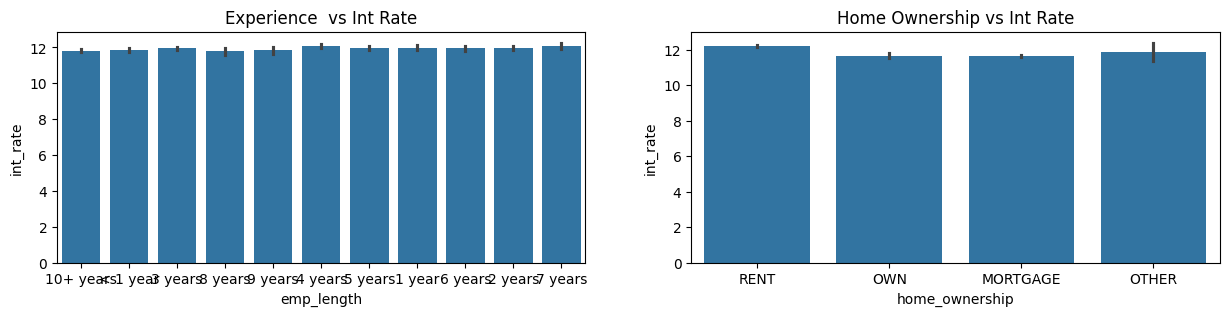

In [69]:
plt.figure(figsize=(15,3))
plt.subplot(121)
sns.barplot(x='emp_length', y=loan.int_rate, data=loan)
plt.title('Experience  vs Int Rate')
plt.subplot(122)
plt.title('Home Ownership vs Int Rate')
sns.barplot(x='home_ownership', y=loan.int_rate, data=loan)

Their is no drastic impact of level of experience on interest rate. On the other hand, borrowers with rent ownership have to pay slightly higher interest rate Int Rate'

Text(0.5, 1.0, 'Loan Status vs Int Rate')

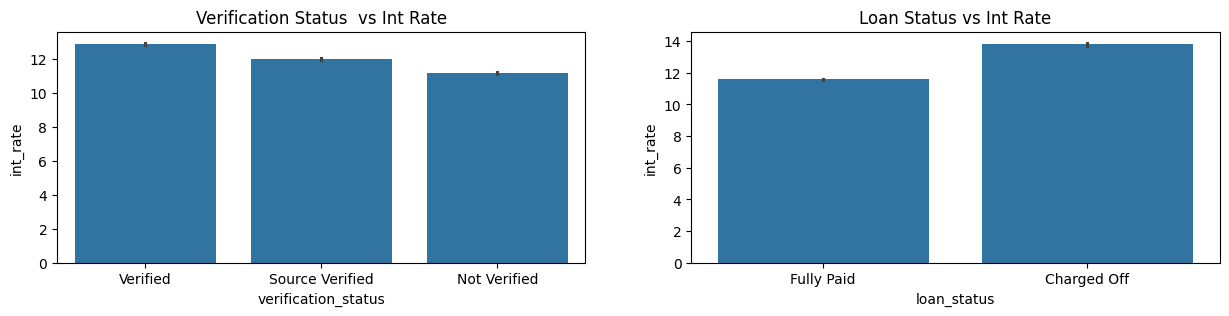

In [70]:
plt.figure(figsize=(15,3))
plt.subplot(121)
sns.barplot(x='verification_status', y=loan.int_rate, data=loan)
plt.title('Verification Status  vs Int Rate')
plt.subplot(122)
sns.barplot(x='loan_status', y=loan.int_rate, data=loan)
plt.title('Loan Status vs Int Rate')

Non Verified Barrowers are paying less interest rates compared to Verified and Source Verified barrowers.

Charged off borrowers are paying higher interest rate on loan compared to fully paid

Text(0.5, 1.0, 'Purpose  vs Int Rate')

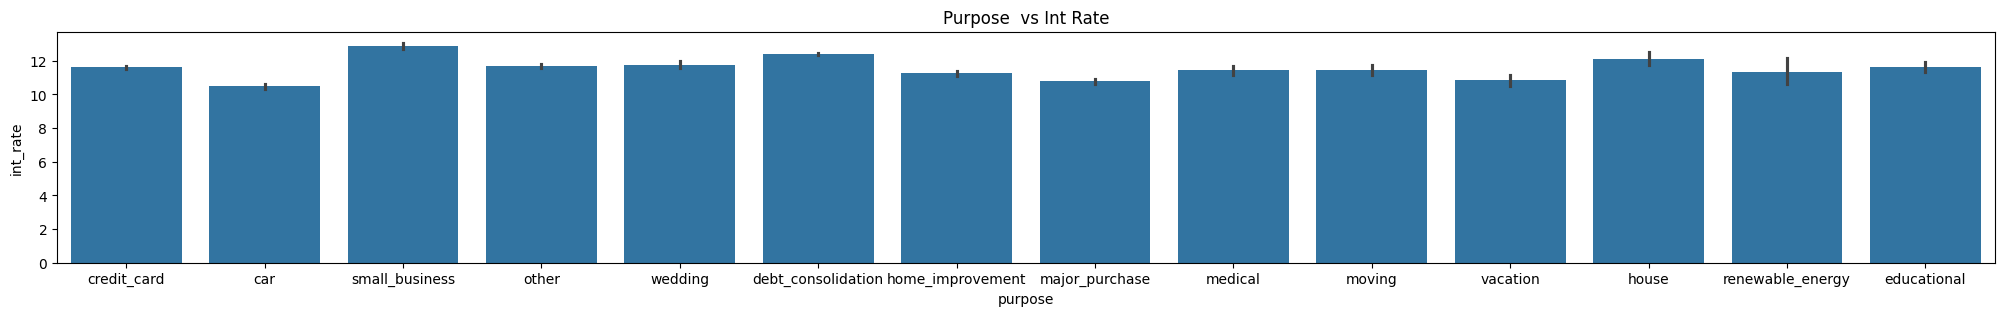

In [71]:
plt.figure(figsize=(25,3))
sns.barplot(x='purpose', y=loan.int_rate, data=loan)
plt.title('Purpose  vs Int Rate')

Borrower with the purpose of opening small business are paying higher interest rate on loan

Annual Income

<Axes: title={'center': 'Grade vs Annual Income'}, xlabel='grade', ylabel='annual_inc'>

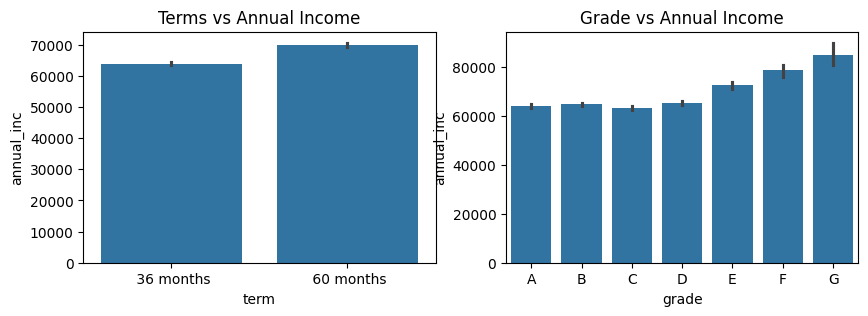

In [72]:
plt.figure(figsize=(10,3))
plt.subplot(121)
sns.barplot(x='term', y=loan.annual_inc, data=loan)
plt.title('Terms vs Annual Income')
plt.subplot(122)
plt.title('Grade vs Annual Income')
order_of_grade = loan.grade.unique()
order_of_grade.sort()
sns.barplot(x='grade', y=loan.annual_inc, order = order_of_grade, data=loan)

Borrower taking loan for 60 months duration and  grade value of G and F are having higher annual income.

<Axes: title={'center': 'Home Ownership vs Annual Income'}, xlabel='home_ownership', ylabel='annual_inc'>

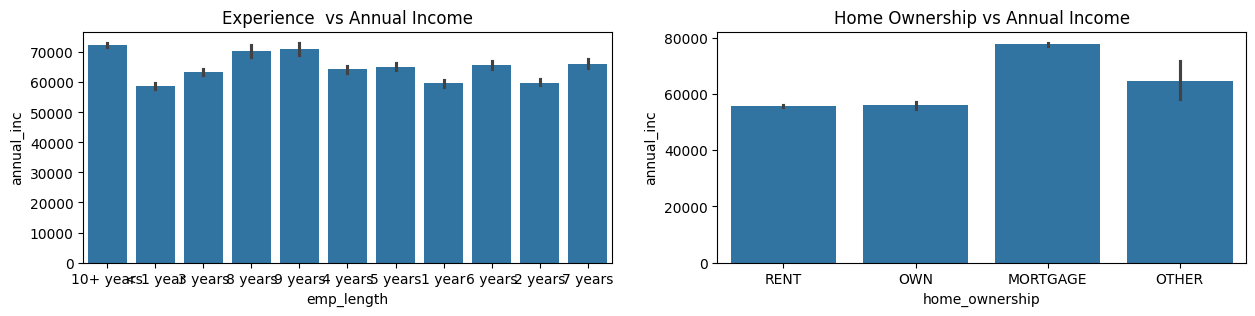

In [73]:
plt.figure(figsize=(15,3))
plt.subplot(121)
sns.barplot(x='emp_length', y=loan.annual_inc, data=loan)
plt.title('Experience  vs Annual Income')
plt.subplot(122)
plt.title('Home Ownership vs Annual Income')
sns.barplot(x='home_ownership', y=loan.annual_inc, data=loan)

Borrowers having 10+ years of experience and mortgage home ownership are having higher income 

Text(0.5, 1.0, 'Loan Status vs Annual Income')

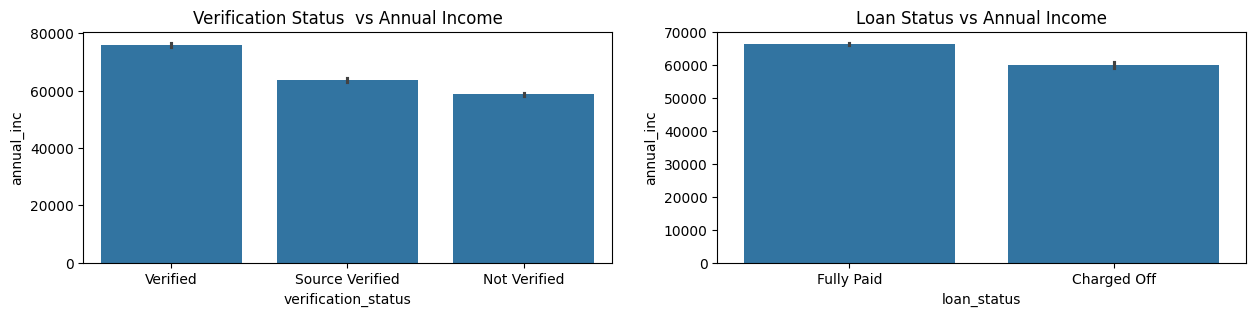

In [74]:
plt.figure(figsize=(15,3))
plt.subplot(121)
sns.barplot(x='verification_status', y=loan.annual_inc, data=loan)
plt.title('Verification Status  vs Annual Income')
plt.subplot(122)
sns.barplot(x='loan_status', y=loan.annual_inc, data=loan)
plt.title('Loan Status vs Annual Income')

Verified and fully paid borrowers are having higher annual income

Text(0.5, 1.0, 'Purpose  vs Annual Income')

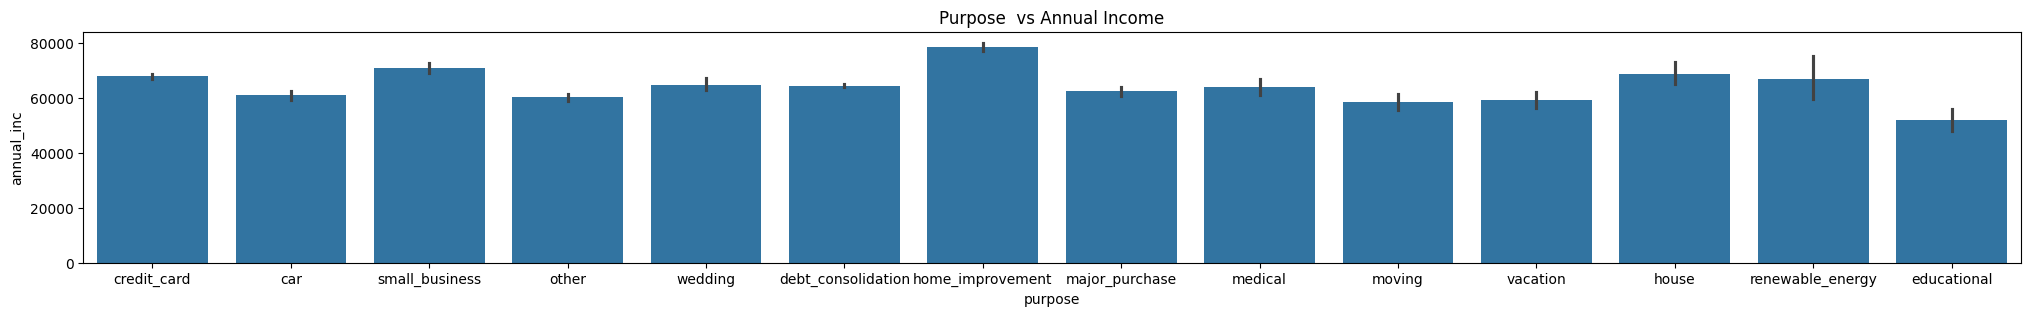

In [75]:
plt.figure(figsize=(25,3))
sns.barplot(x='purpose', y=loan.annual_inc, data=loan)
plt.title('Purpose  vs Annual Income')

Borrowers taking loan with the purpose of home improvement are having higher annual income

DTI

<Axes: title={'center': 'Grade vs DTI'}, xlabel='grade', ylabel='dti'>

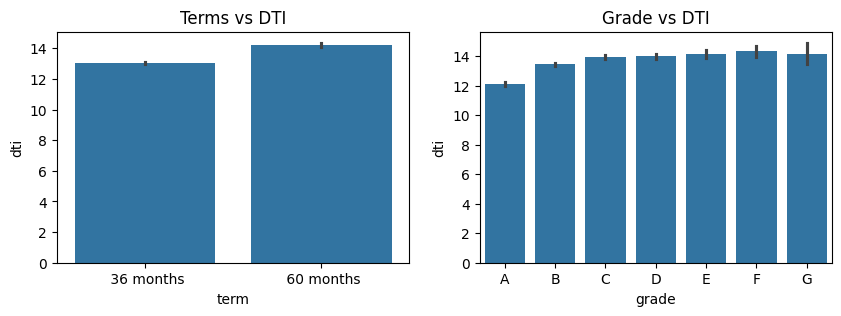

In [76]:
plt.figure(figsize=(10,3))
plt.subplot(121)
sns.barplot(x='term', y=loan.dti, data=loan)
plt.title('Terms vs DTI')
plt.subplot(122)
plt.title('Grade vs DTI')
order_of_grade = loan.grade.unique()
order_of_grade.sort()
sns.barplot(x='grade', y=loan.dti, order = order_of_grade, data=loan)

Borrower taking loan for 60 months duration are having higher DTI. On the other hand, group A is having the lowest DTI

<Axes: title={'center': 'Home Ownership vs DTI'}, xlabel='home_ownership', ylabel='dti'>

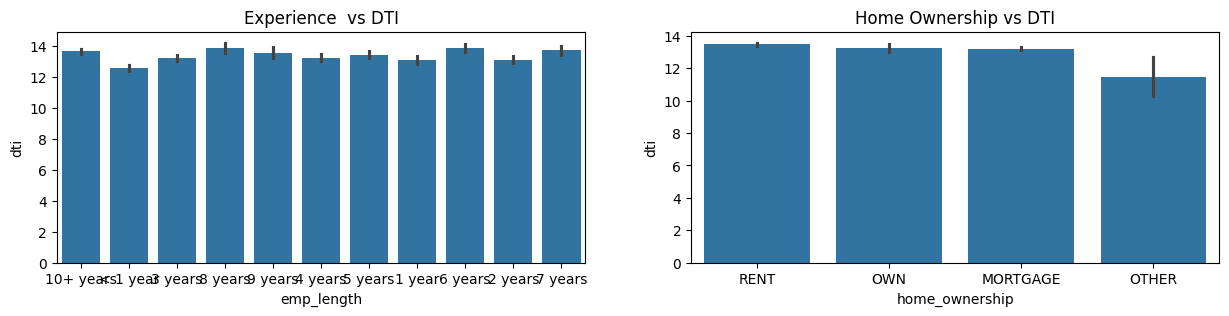

In [77]:
plt.figure(figsize=(15,3))
plt.subplot(121)
sns.barplot(x='emp_length', y=loan.dti, data=loan)
plt.title('Experience  vs DTI')
plt.subplot(122)
plt.title('Home Ownership vs DTI')
sns.barplot(x='home_ownership', y=loan.dti, data=loan)

NOT SURE

Text(0.5, 1.0, 'Loan Status vs DTI')

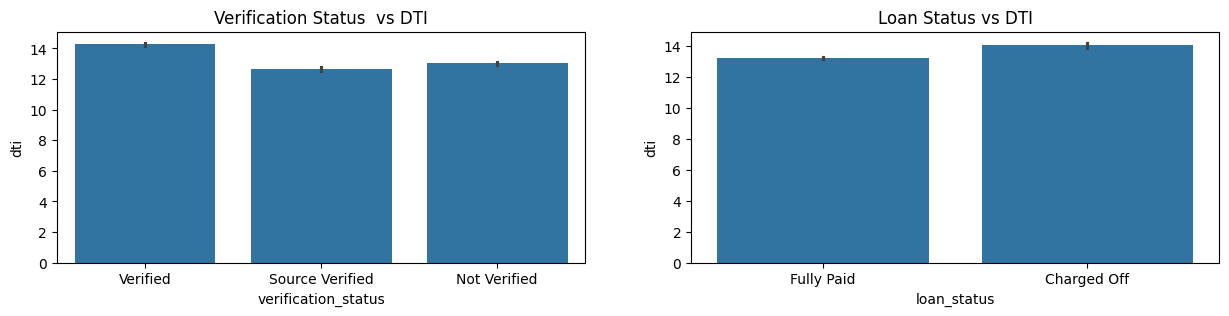

In [78]:
plt.figure(figsize=(15,3))
plt.subplot(121)
sns.barplot(x='verification_status', y=loan.dti, data=loan)
plt.title('Verification Status  vs DTI')
plt.subplot(122)
sns.barplot(x='loan_status', y=loan.dti, data=loan)
plt.title('Loan Status vs DTI')

Verified and charged off borrowers are having higher DTI

Text(0.5, 1.0, 'Purpose  vs DTI')

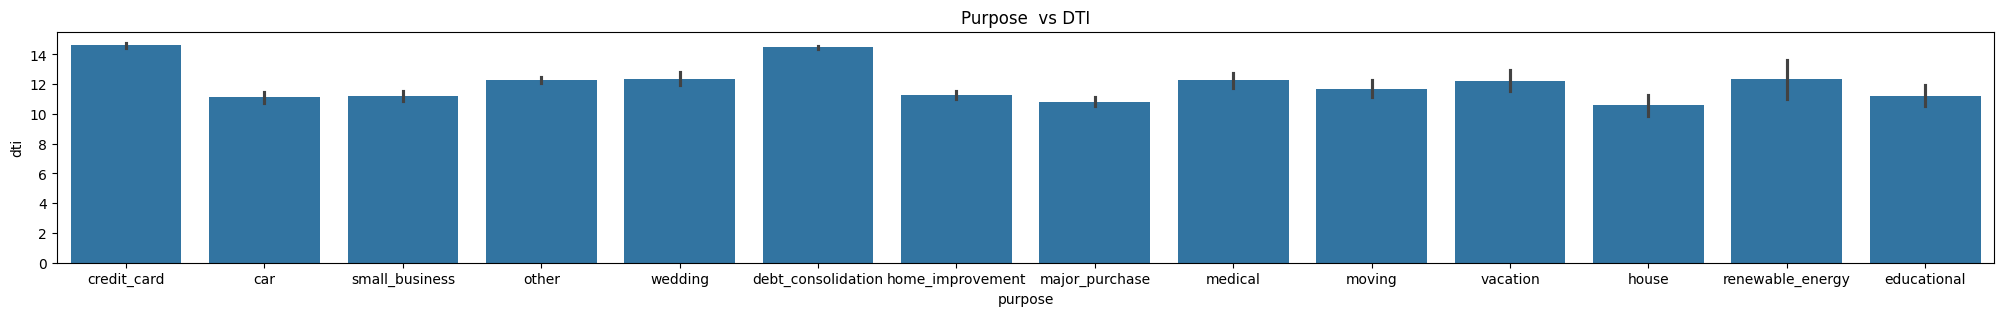

In [79]:
plt.figure(figsize=(25,3))
sns.barplot(x='purpose', y=loan.dti, data=loan)
plt.title('Purpose  vs DTI')

Credit card and debt consolidation borrower are having similar level of DTI

Funded Amount

<Axes: title={'center': 'Grade vs Funded Amount'}, xlabel='grade', ylabel='funded_amnt'>

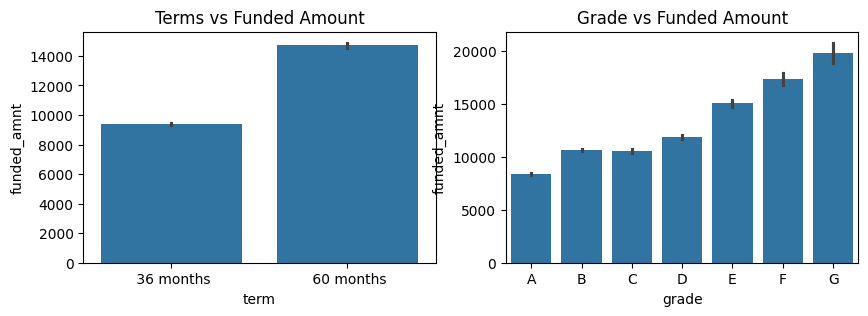

In [80]:
plt.figure(figsize=(10,3))
plt.subplot(121)
sns.barplot(x='term', y=loan.funded_amnt, data=loan)
plt.title('Terms vs Funded Amount')
plt.subplot(122)
plt.title('Grade vs Funded Amount')
order_of_grade = loan.grade.unique()
order_of_grade.sort()
sns.barplot(x='grade', y=loan.funded_amnt, order = order_of_grade, data=loan)

observation: Majority of long term laon are of high funded amount. G has the highest funded amount

<Axes: title={'center': 'Home Ownership vs Funded Amount'}, xlabel='home_ownership', ylabel='funded_amnt'>

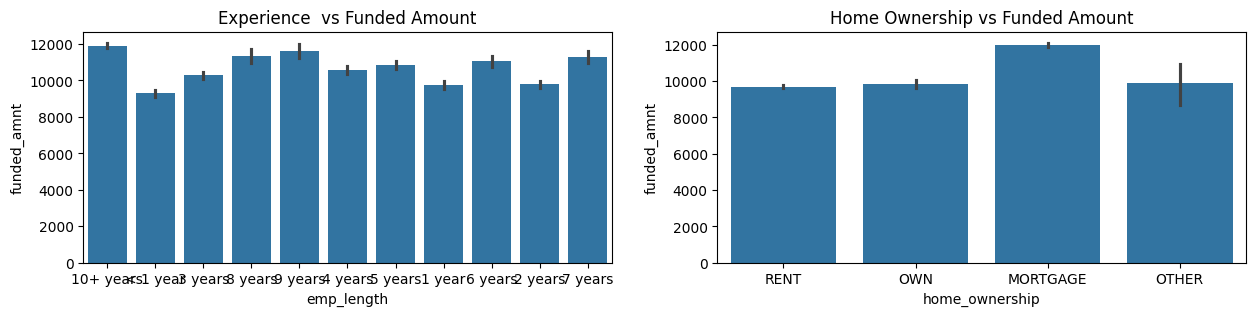

In [81]:
plt.figure(figsize=(15,3))
plt.subplot(121)
sns.barplot(x='emp_length', y=loan.funded_amnt, data=loan)
plt.title('Experience  vs Funded Amount')
plt.subplot(122)
plt.title('Home Ownership vs Funded Amount')
sns.barplot(x='home_ownership', y=loan.funded_amnt, data=loan)

Observation: Majority of borrowsers have working experience greater than 10 years.

Text(0.5, 1.0, 'Loan Status vs Funded Amount')

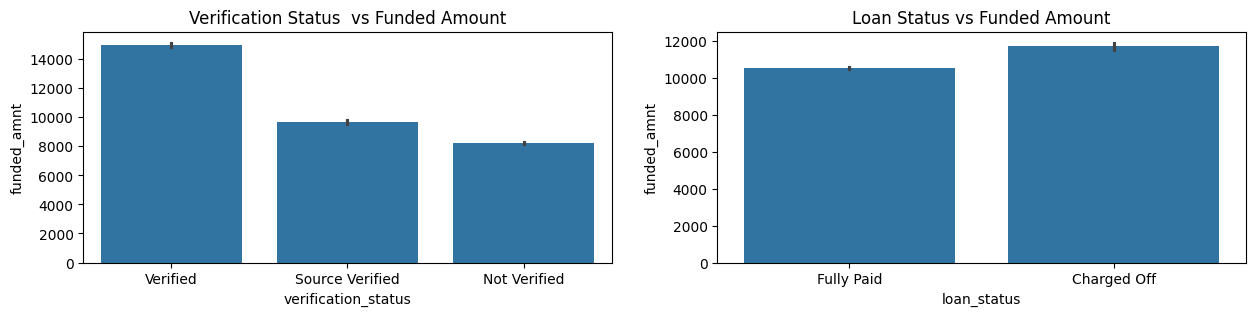

In [82]:
plt.figure(figsize=(15,3))
plt.subplot(121)
sns.barplot(x='verification_status', y=loan.funded_amnt, data=loan)
plt.title('Verification Status  vs Funded Amount')
plt.subplot(122)
sns.barplot(x='loan_status', y=loan.funded_amnt, data=loan)
plt.title('Loan Status vs Funded Amount')

Observation : Higher funder amounnt falls in "Verified"

Text(0.5, 1.0, 'Purpose  vs Funded Amount')

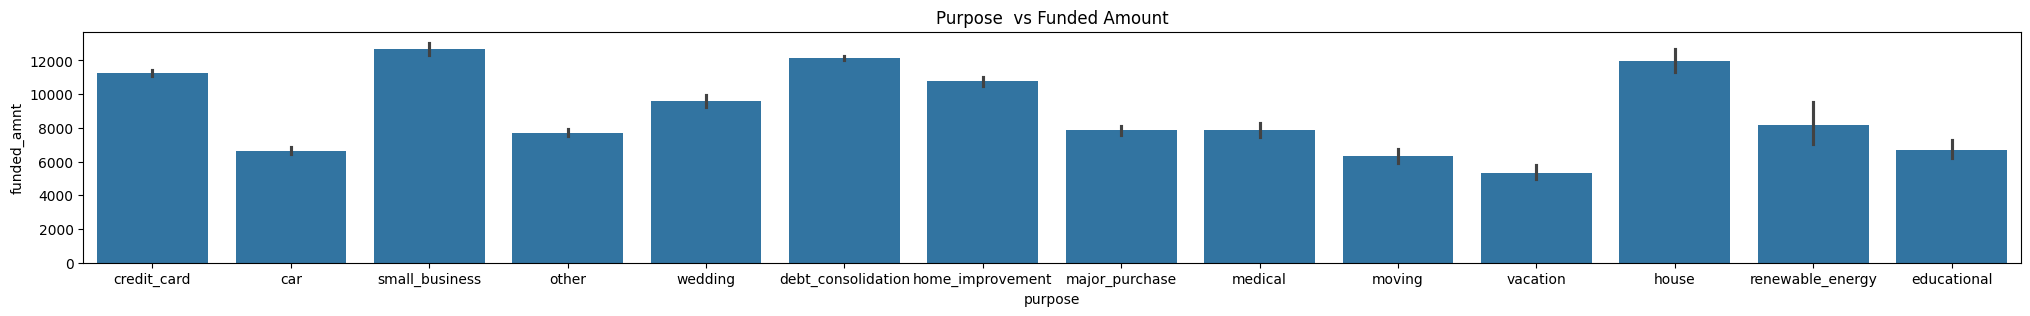

In [83]:
plt.figure(figsize=(25,3))
sns.barplot(x='purpose', y=loan.funded_amnt, data=loan)
plt.title('Purpose  vs Funded Amount')

observation :Debt Consolidation is the most popular loan purpose and has highest number of fully paid loan and defaulted loan.

In [84]:
categorical_col

['term',
 'grade',
 'sub_grade',
 'emp_length',
 'home_ownership',
 'verification_status',
 'loan_status',
 'purpose',
 'addr_state',
 'inq_last_6mths',
 'open_acc',
 'pub_rec',
 'total_acc',
 'pub_rec_bankruptcies',
 'issue_month',
 'issue_week']

In [17]:
numerical_col

['loan_amnt',
 'funded_amnt',
 'funded_amnt_inv',
 'int_rate',
 'installment',
 'annual_inc',
 'dti',
 'revol_util']

Funded Amount by Invester

<Axes: title={'center': 'Grade vs Funded Amount by Invester'}, xlabel='grade', ylabel='funded_amnt_inv'>

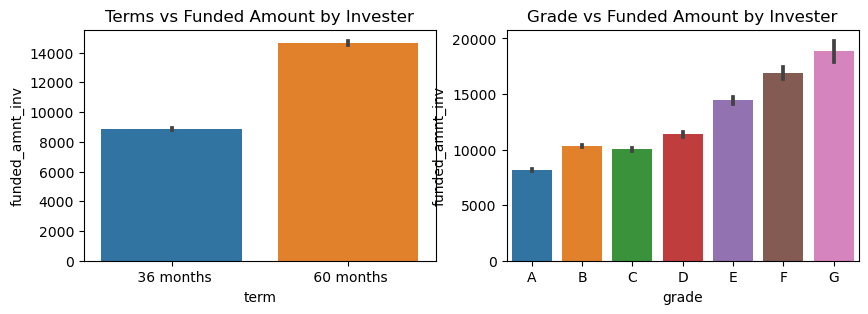

In [22]:
plt.figure(figsize=(10,3))
plt.subplot(121)
sns.barplot(x='term', y=loan.funded_amnt_inv,data=loan)
plt.title('Terms vs Funded Amount by Invester')
plt.subplot(122)
plt.title('Grade vs Funded Amount by Invester')
order_of_grade = loan.grade.unique()
order_of_grade.sort()
sns.barplot(x='grade', y=loan.funded_amnt_inv, order = order_of_grade, data=loan)

<Axes: title={'center': 'Home Ownership vs Funded Amount by Invester'}, xlabel='home_ownership', ylabel='funded_amnt_inv'>

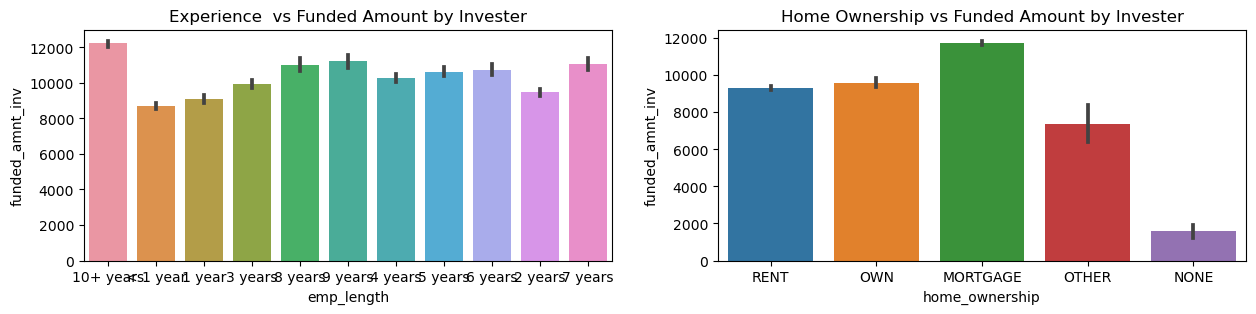

In [23]:
plt.figure(figsize=(15,3))
plt.subplot(121)
sns.barplot(x='emp_length', y=loan.funded_amnt_inv, data=loan)
plt.title('Experience  vs Funded Amount by Invester')
plt.subplot(122)
plt.title('Home Ownership vs Funded Amount by Invester')
sns.barplot(x='home_ownership', y=loan.funded_amnt_inv, data=loan)

observation : Majority of borrowsers don't posses property and are on mortage or rent

Text(0.5, 1.0, 'Loan Status vs Funded Amount by Invester')

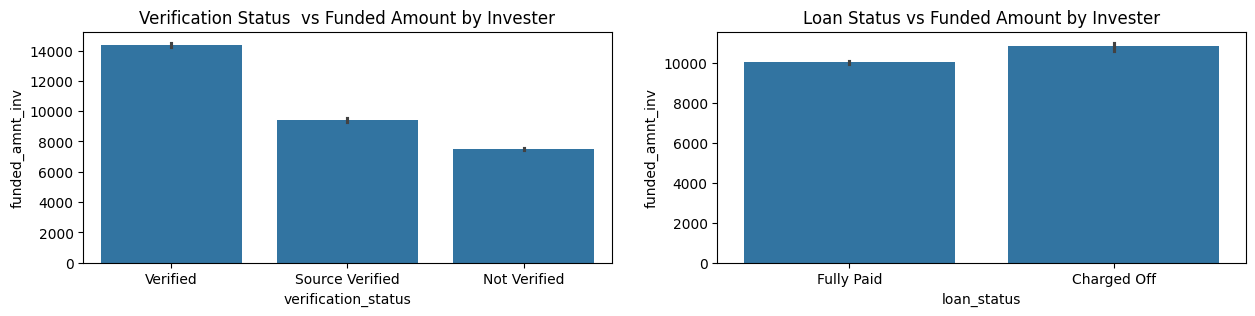

In [91]:
plt.figure(figsize=(15,3))
plt.subplot(121)
sns.barplot(x='verification_status', y=loan.funded_amnt_inv, data=loan)
plt.title('Verification Status  vs Funded Amount by Invester')
plt.subplot(122)
sns.barplot(x='loan_status', y=loan.funded_amnt_inv, data=loan)
plt.title('Loan Status vs Funded Amount by Invester')

Text(0.5, 1.0, 'Purpose  vs Funded Amount by Invester')

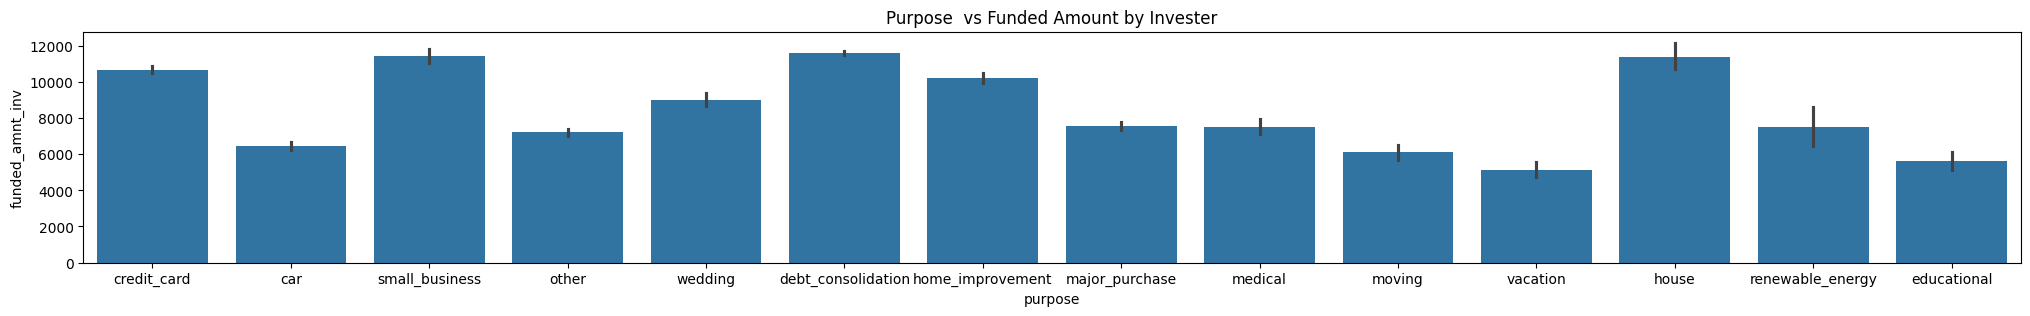

In [92]:
plt.figure(figsize=(25,3))
sns.barplot(x='purpose', y=loan.funded_amnt_inv, data=loan)
plt.title('Purpose  vs Funded Amount by Invester')

----Bivariate Analysis 

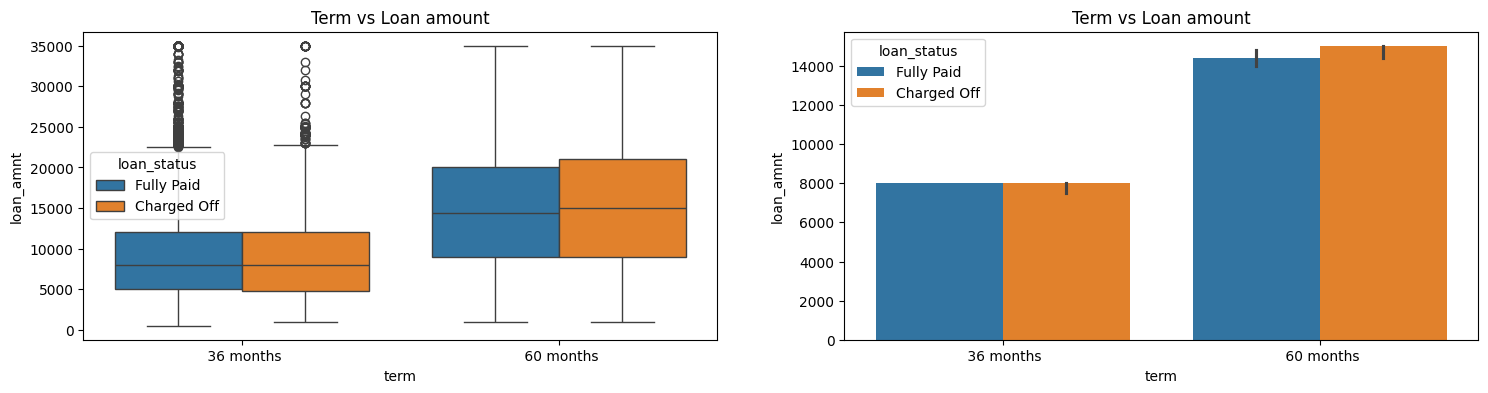

In [94]:
plt.figure(figsize=(18,4))
plt.subplot(121)
sns.boxplot(x='term', y='loan_amnt', hue='loan_status', data=loan)
plt.title('Term vs Loan amount')
plt.subplot(122)
sns.barplot(x='term', y='loan_amnt', hue='loan_status',estimator=np.median, data=loan)
plt.title('Term vs Loan amount')
plt.show()

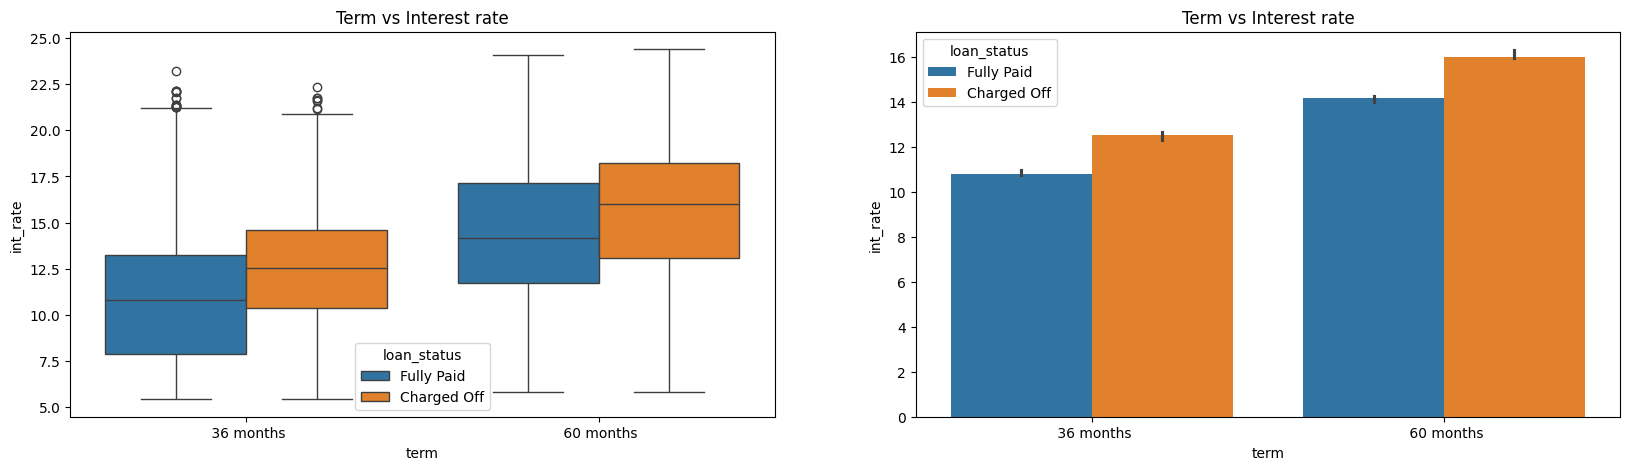

In [95]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='term', y='int_rate', hue='loan_status', data=loan)
plt.title('Term vs Interest rate')
plt.subplot(122)
sns.barplot(x='term', y='int_rate', hue='loan_status', data=loan, estimator=np.median)
plt.title('Term vs Interest rate')
plt.show()

observcation

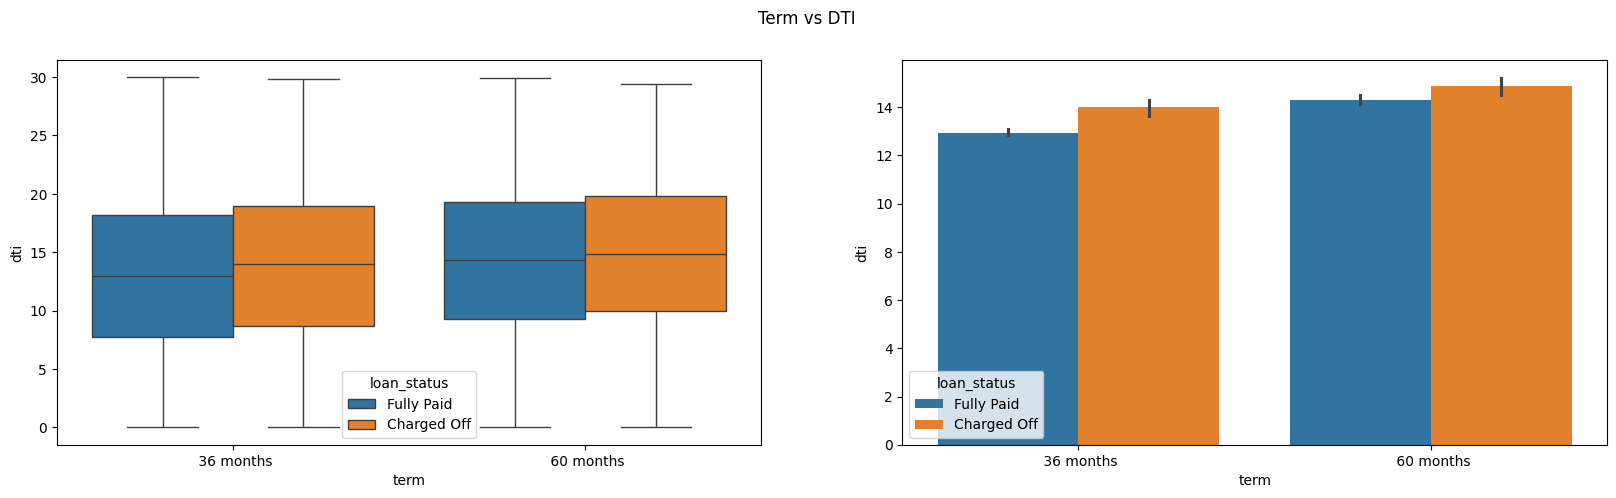

In [96]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='term', y='dti', hue='loan_status', data=loan)
plt.subplot(122)
sns.barplot(x='term', y='dti', hue='loan_status', data=loan, estimator=np.median)
plt.suptitle('Term vs DTI')
plt.show()

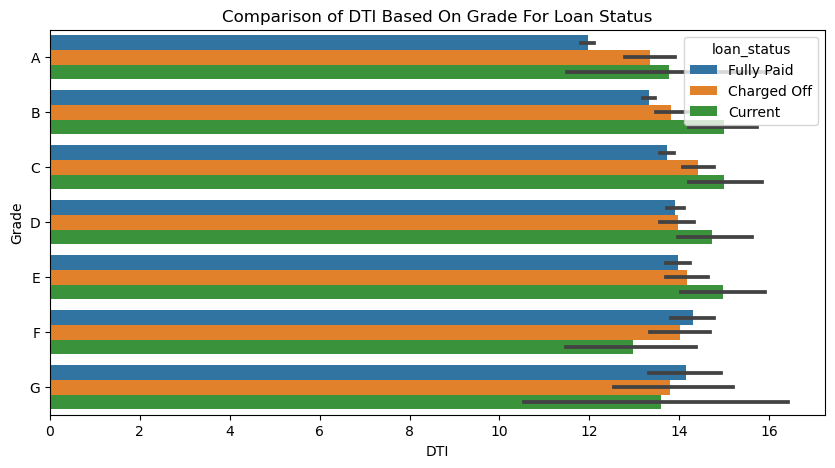

In [33]:
# Comparison of DTI over grade for loan status
plt.figure(figsize=(10,5))
sns.barplot(data=loan,x='dti',y='grade',hue='loan_status')
plt.xlabel('DTI')
plt.ylabel('Grade')
plt.title('Comparison of DTI Based On Grade For Loan Status',fontsize=12)
plt.show()

Observation : The Grade A which is lowest risk also has lowest DTI ratio which we can say that higher grade has lower rate of default.

<Figure size 1000x500 with 0 Axes>

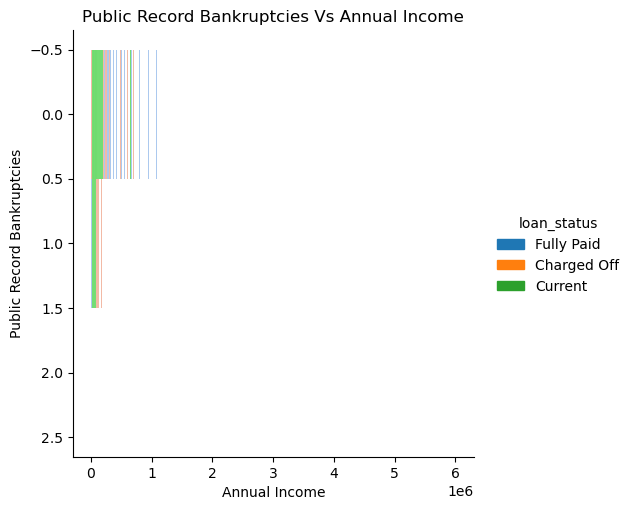

In [36]:
# Comparison of annual income to public record bankruptcy over loan status
plt.figure(figsize=(10,5))
sns.displot(y=loan.pub_rec_bankruptcies.astype('category'),x=loan.annual_inc,hue=loan.loan_status)
plt.xlabel('Annual Income')
plt.ylabel('Public Record Bankruptcies')
plt.title('Public Record Bankruptcies Vs Annual Income',fontsize=12)
plt.show()

 Observation : The brrowers are mostly having no record of Public Recorded Bankruptcy and are safe choice for loan issue.

In [ ]:
# Heatmap of correlation between variables
plt.figure(figsize=(10,10))
sns.heatmap(loan.corr(),annot=True)
plt.show()

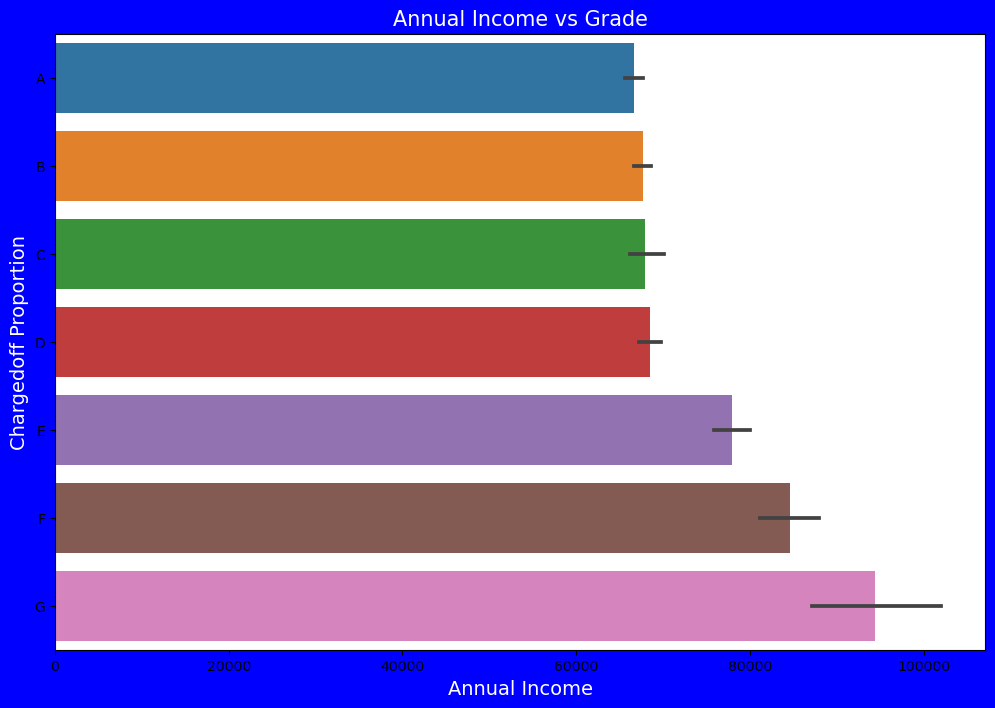

In [48]:
# Plot the above calculation

fig, ax1 = plt.subplots(figsize=(12, 8),facecolor='b')
ax1.set_title('Annual Income vs Grade',fontsize=15,color = 'w')
ax1=sns.barplot(x='annual_inc', y='grade', data=loan)
ax1.set_ylabel('Chargedoff Proportion',fontsize=14,color = 'w')
ax1.set_xlabel('Annual Income',fontsize=14,color='w')
plt.show()